<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial97_DL_terminology_batch_size_iterations_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/OSY7hWADMZk

Do not forget to sign up for your free APEER account to use pre-built machine learning tools for semantic and instance segmentation
www.apeer.com

In [ ]:
"""
Dataset information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
## 'data.frame':    569 obs. of  31 variables:
##  $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...
##  $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
##  $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
##  $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
##  $ area_mean              : num  1001 1326 1203 386 1297 ...
##  $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
##  $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
##  $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
##  $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
##  $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
##  $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
##  $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
##  $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
##  $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
##  $ area_se                : num  153.4 74.1 94 27.2 94.4 ...
##  $ smoothness_se          : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
##  $ compactness_se         : num  0.049 0.0131 0.0401 0.0746 0.0246 ...
##  $ concavity_se           : num  0.0537 0.0186 0.0383 0.0566 0.0569 ...
##  $ concave.points_se      : num  0.0159 0.0134 0.0206 0.0187 0.0188 ...
##  $ symmetry_se            : num  0.03 0.0139 0.0225 0.0596 0.0176 ...
##  $ fractal_dimension_se   : num  0.00619 0.00353 0.00457 0.00921 0.00511 ...
##  $ radius_worst           : num  25.4 25 23.6 14.9 22.5 ...
##  $ texture_worst          : num  17.3 23.4 25.5 26.5 16.7 ...
##  $ perimeter_worst        : num  184.6 158.8 152.5 98.9 152.2 ...
##  $ area_worst             : num  2019 1956 1709 568 1575 ...
##  $ smoothness_worst       : num  0.162 0.124 0.144 0.21 0.137 ...
##  $ compactness_worst      : num  0.666 0.187 0.424 0.866 0.205 ...
##  $ concavity_worst        : num  0.712 0.242 0.45 0.687 0.4 ...
##  $ concave.points_worst   : num  0.265 0.186 0.243 0.258 0.163 ...
##  $ symmetry_worst         : num  0.46 0.275 0.361 0.664 0.236 ...
##  $ fractal_dimension_worst: num  0.1189 0.089 0.0876 0.173 0.0768 ...

"""

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wisconsin_breast_cancer_dataset.csv")

In [ ]:
print(df.describe().T)

In [ ]:
print(df.isnull().sum())
#df = df.dropna()

In [ ]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'Diagnosis':'Label'})
print(df.dtypes)

In [ ]:
#Understand the data 
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "ID"], axis=1) 
print(X.describe().T) #Needs scaling

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

In [ ]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras

In [ ]:
opt1 = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)  #Check momentum 0.1 and 0.9. Also check lr=0.001 and 0.1
opt2 = keras.optimizers.Adam(learning_rate=0.001) #Verify against SGD for lr=0.01 and 0.001

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer=opt1, metrics=['accuracy'])  #Change optimizer here

print(model.summary())

In [ ]:
#Understanding batch size... 
from math import ceil #Rounding up
print("Shape of training data is: ", X_train.shape)

# Batch size: Number of samples that will pass through the network before updating the model parameters
# Batch size samples go through one full forward and backward propagation
batch_size=16  #Change batch_size from 8 to 64 to 128 to see how model converges faster with batch size 8. ALso check accuracy. 

#Epochs: All available training data passes through the network per epoch. 
# All data goes through forward and backward propagation once. 
epochs = 100  # 

#Data is ivided into batches primarily to make sure it fits the available memory. 
#Iterations is number of batches per epoch. 
iterations = X_train.shape[0]/batch_size
print("Number of iterations per epoch = ", ceil(iterations))

#KEY SUMMARY
#1. You may be limited to small batch size based on your system hardware.
#2. Smaller batches mean each step in gradient descent may be less accurate, so it may take longer to converge.
#3. But, for larger batches the model may not be generalized enough, so smaller batches are preferable. 
#4. Larger batch sizes result in faster progress but don;t always converge as fast. 
#5. Smaller batches train slower, but can converge faster. 
#6. Batch size 32 or 64 is a good starting point.  


Shape of training data is:  (426, 30)
Number of iterations per epoch =  27


In [ ]:
# Restart session to remove model from memory and start training from scratch.
# This is the only way for true comparison of the effect of various parameters. 

In [ ]:
#Fit with no early stopping or other callbacks

history = model.fit(X_train, y_train, verbose=1, epochs=300, batch_size=batch_size,
                    validation_data=(X_test, y_test))


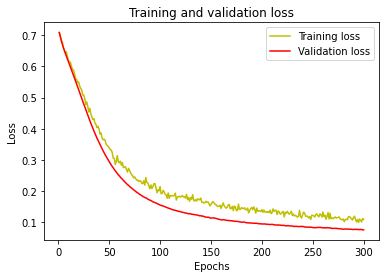

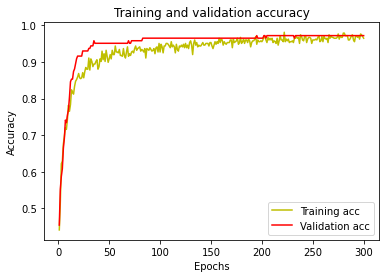

In [ ]:
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

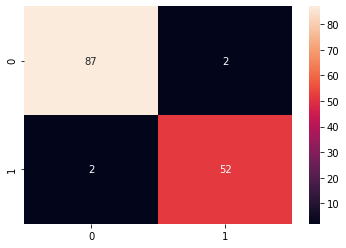

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)